In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
us_farmers_market="https://assets.datacamp.com/production/repositories/3841/datasets/efdbc5d7c7b734f0b091d924605c4ad2664ef830/markets_cleaned.csv"
farmer = pd.read_csv(us_farmers_market, sep=',')
farmer.head()


,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Plants,Poultry,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,0,1,1,0,1,0,1,1,0,0
1,1018318,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,-81.733939,41.374801,4.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1009364,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,-82.818700,34.804200,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1010691,10th Steet Community Farmers Market,Lamar,Barton,Missouri,-94.274619,37.495628,8.0,1,0,...,1,1,1,0,1,0,0,1,0,0
4,1002454,112st Madison Avenue,New York,New York,New York,-73.949300,40.793900,5.0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [4]:
census = pd.read_csv('census-state-populations.csv', sep=',')
census.head()

,state,pop_est_2014
0,Alabama,4849377
1,Alaska,736732
2,Arizona,6731484
3,Arkansas,2966369
4,California,38802500


In [18]:
first_rows = farmer.head(3).transpose()
print(first_rows)

# Get descriptions of every column
col_descriptions = farmer.describe(include = 'all',
                                percentiles = [0.5]).transpose()
print(col_descriptions)

                                                             0  \
FMID                                                   1018261   
name           Caledonia Farmers Market Association - Danville   
city                                                  Danville   
county                                               Caledonia   
state                                                  Vermont   
lat                                                   -72.1403   
lon                                                     44.411   
months_open                                                  3   
Bakedgoods                                                   1   
Beans                                                        1   
Cheese                                                       1   
Coffee                                                       1   
Crafts                                                       1   
Eggs                                                         1   
Flowers   

In [7]:
# just show median
farmer.describe(percentiles=[0.5], include='all')

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Plants,Poultry,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine
count,8.739000e+03,8739,8699,8228,8739,8710.000000,8710.000000,5452.000000,8739.000000,8739.000000,...,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000
unique,NaN,8158,4697,1503,53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,El Mercado Familiar,Chicago,Los Angeles,California,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,62,121,760,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.010671e+06,NaN,NaN,NaN,NaN,-90.925689,39.133725,6.456346,0.592516,0.098638,...,0.439295,0.304383,0.411031,0.166495,0.456460,0.026319,0.187779,0.652935,0.098066,0.116489
std,5.532805e+04,NaN,NaN,NaN,NaN,17.366333,5.286239,2.743168,0.491394,0.298193,...,0.496330,0.460172,0.492049,0.372546,0.498129,0.160091,0.390558,0.476064,0.297421,0.320829
min,1.000001e+06,NaN,NaN,NaN,NaN,-166.540000,17.709900,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.006895e+06,NaN,NaN,NaN,NaN,-86.249268,40.017753,6.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.000036e+06,NaN,NaN,NaN,NaN,-64.704300,64.862750,12.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
farmer.shape

(8739, 37)

In [6]:
merged_df = pd.merge(farmer, census, on="state")
merged_df

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Poultry,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,pop_est_2014
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,1,1,0,1,0,1,1,0,0,626562
1,1018517,Barre Farmers Market,Barre,Washington,Vermont,-72.497551,44.197006,6.0,1,0,...,0,1,0,0,0,0,1,0,1,626562
2,1004386,Bethel Farmers Market,Bethel,Windsor,Vermont,-72.646100,43.844400,NaN,0,0,...,0,0,0,0,0,0,0,0,0,626562
3,1009876,Bradford Farmers Market,Bradford,Orange,Vermont,-72.125770,43.998409,6.0,1,0,...,1,1,0,1,0,0,0,0,0,626562
4,1005714,Brandon Farmers Market,Brandon,Rutland,Vermont,-73.086312,43.791861,6.0,1,0,...,1,0,0,1,0,0,1,0,0,626562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1005678,Wind River Reservation Tribal Farmers Market,Arapahoe,Fremont,Wyoming,-108.484769,42.983952,3.0,1,0,...,0,1,0,1,0,0,1,1,0,584153
8689,1005676,Wind River Reservation Tribal Farmers Market,Fort Washakie,Fremont,Wyoming,-108.882077,43.003640,4.0,1,0,...,0,1,0,1,0,0,1,1,0,584153
8690,1005677,Wind River Reservation Tribal Farmers Market,"Ft. Washakie, WY",Fremont,Wyoming,-108.777196,43.026816,NaN,1,0,...,1,1,0,1,0,0,1,1,0,584153
8691,1016841,Winter Makers Market,Casper,Natrona,Wyoming,-106.323421,42.848959,5.0,1,1,...,0,0,0,1,0,0,1,0,0,584153


In [9]:
column_list = list(merged_df)

print(column_list)

['FMID', 'name', 'city', 'county', 'state', 'lat', 'lon', 'months_open', 'Bakedgoods', 'Beans', 'Cheese', 'Coffee', 'Crafts', 'Eggs', 'Flowers', 'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 'Juices', 'Maple', 'Meat', 'Mushrooms', 'Nursery', 'Nuts', 'PetFood', 'Plants', 'Poultry', 'Prepared', 'Seafood', 'Soap', 'Tofu', 'Trees', 'Vegetables', 'WildHarvested', 'Wine', 'pop_est_2014']


In [16]:
df = pd.DataFrame(merged_df, columns=['Bakedgoods','Beans','Cheese', 'Coffee', 'Crafts', 'Eggs', 'Flowers', 'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 'Juices', 'Maple', 'Meat', 'Mushrooms', 'Nursery', 'Nuts', 'PetFood', 'Plants', 'Poultry', 'Prepared', 'Seafood', 'Soap', 'Tofu', 'Trees', 'Vegetables', 'WildHarvested', 'Wine'])
sum_row = df.sum(axis=1)
sum_row.head()



0    20
1    10
2     0
3    15
4    15
dtype: int64

In [18]:
merged_df['num_items_sold']= pd.DataFrame(merged_df, columns=['Bakedgoods','Beans','Cheese', 'Coffee', 'Crafts', 'Eggs', 'Flowers', 'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 'Juices', 'Maple', 'Meat', 'Mushrooms', 'Nursery', 'Nuts', 'PetFood', 'Plants', 'Poultry', 'Prepared', 'Seafood', 'Soap', 'Tofu', 'Trees', 'Vegetables', 'WildHarvested', 'Wine']).sum(axis=1)

In [19]:
merged_df.head()

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,pop_est_2014,num_items_sold
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,1,0,1,0,1,1,0,0,626562,20
1,1018517,Barre Farmers Market,Barre,Washington,Vermont,-72.497551,44.197006,6.0,1,0,...,1,0,0,0,0,1,0,1,626562,10
2,1004386,Bethel Farmers Market,Bethel,Windsor,Vermont,-72.646100,43.844400,NaN,0,0,...,0,0,0,0,0,0,0,0,626562,0
3,1009876,Bradford Farmers Market,Bradford,Orange,Vermont,-72.125770,43.998409,6.0,1,0,...,1,0,1,0,0,0,0,0,626562,15
4,1005714,Brandon Farmers Market,Brandon,Rutland,Vermont,-73.086312,43.791861,6.0,1,0,...,0,0,1,0,0,1,0,0,626562,15


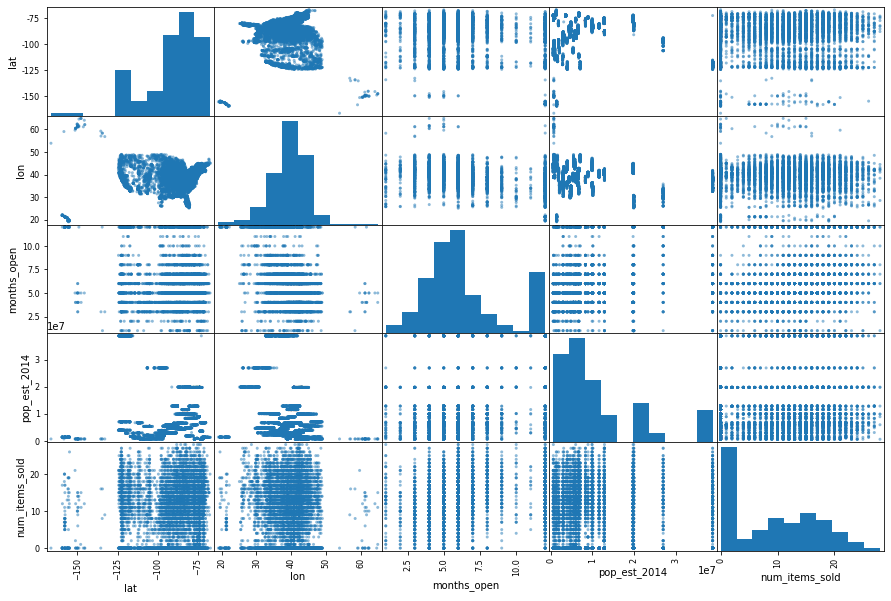

In [20]:
# Select just the numeric columns (exluding individual goods)
numeric_columns = ['lat', 'lon', 'months_open', 'pop_est_2014','num_items_sold']


# Reduce point opacity to 50% to show regions of overlap.
# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(merged_df[numeric_columns], 
                             # Make figure large to show details
                             figsize = (15,10), 
                           # Lower point opacity to show overlap
                           alpha = 0.5)

plt.show()

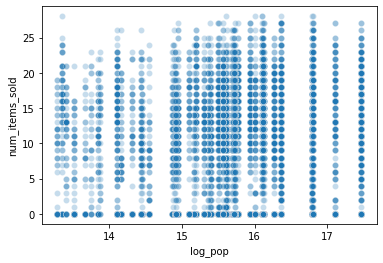

In [23]:
# Create a new logged population column 
merged_df['log_pop'] = np.log(merged_df['pop_est_2014'])

# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x = 'log_pop', 
                  y = 'num_items_sold', 
                  # Reduce point opacity to show overlap
                  alpha = 0.25, 
                  data = merged_df)

plt.show()

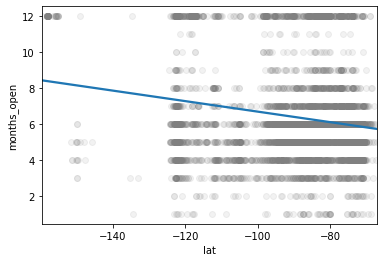

In [27]:
#  points opacity to 10%

sns.regplot(x = 'lat', 
            y = 'months_open', 
            # Set scatter point opacity & color
            scatter_kws = {'alpha':0.10, 'color':'gray'}, 
            # Disable confidence band
            ci = False, 
            data = merged_df)

plt.show()

In [29]:
from math import log

markets_and_pop = (merged_df
    .groupby('state', as_index = False)
    .agg({
       'name': lambda d: log(len(d)),
       'pop_est_2014': lambda d: log(d.iloc[0]) })
    .rename(columns = {
        'name': 'log_markets', 
        'pop_est_2014': 'log_pop' }))

/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: not enough values to unpack (expected 5, got 3)

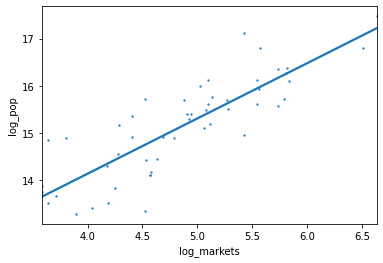

In [34]:
g = sns.regplot(
    "log_markets", "log_pop", 
    ci = False,
    # Shrink scatter plot points
    scatter_kws = {'s':2},
    data = markets_and_pop)

# Iterate over the rows of the data
for _, row in markets_and_pop.iterrows():
    state, _, _, log_markets, log_pop = row
    # Place annotation and reduce size for clarity
    g.annotate(state,(log_markets,log_pop),size = 10)

plt.show()

In [ ]:
In [1]:
goods_by_state.head()
Out[1]:

     state        good  prop_selling
0  Alabama  Bakedgoods      0.760563
1  Alabama       Beans      0.084507
2  Alabama      Cheese      0.225352
3  Alabama      Coffee      0.197183
4  Alabama      Crafts      0.422535

#state - the name of the state
#good - the good of interest
#prop_selling - the proportion of markets in that state that sell that good

In [35]:
# Subset goods to interesting ones
to_plot = ['Cheese','Maple','Fruits','Grains','Seafood','Plants','Vegetables']
goods_by_state_small = goods_by_state.query("good in "+str(to_plot))

g = sns.scatterplot('good','prop_selling', data = goods_by_state_small,
                    # Hide scatter points by shrinking to nothing
                    s = 0)

for _,row in goods_by_state_small.iterrows():
  g.annotate(row['state'], (row['good'], row['prop_selling']), 
             # Center annotation on axis
             ha = 'center', 
             size = 10)

plt.show()

NameError: name 'goods_by_state' is not defined

### Making your visualizations efficient


/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


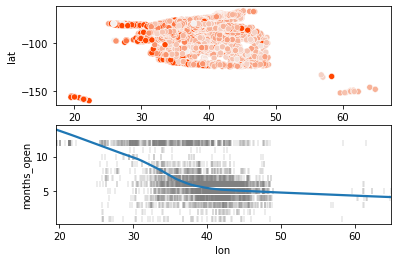

In [36]:
# Setup two stacked plots
_, (ax1, ax2) = plt.subplots(2, 1)

# Draw location scatter plot on first plot
sns.scatterplot("lon", "lat", 'months_open', 
                palette = sns.light_palette("orangered",n_colors = 12), 
                legend = False, data = merged_df,
                ax = ax1);

# Plot a regression plot on second plot
sns.regplot('lon', 'months_open',
            scatter_kws = {'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess = True,
            marker = '|', data = merged_df, 
            ax = ax2)

plt.show()

In [49]:
# people_per_market= a state's population and the number of markets.
merged_df['number_of_market']=merged_df.groupby(by='state')['name'].transform('count')
merged_df
merged_df['people_per_market']=merged_df['pop_est_2014']/ merged_df['number_of_market']


In [68]:
# Create a new logged population column 
merged_df['log_markets'] = np.log(merged_df['number_of_market'])
merged_df

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Trees,Vegetables,WildHarvested,Wine,pop_est_2014,num_items_sold,log_pop,number_of_market,people_per_market,log_markets
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,1,1,0,0,626562,20,13.348003,92,6810.456522,4.521789
1,1018517,Barre Farmers Market,Barre,Washington,Vermont,-72.497551,44.197006,6.0,1,0,...,0,1,0,1,626562,10,13.348003,92,6810.456522,4.521789
2,1004386,Bethel Farmers Market,Bethel,Windsor,Vermont,-72.646100,43.844400,NaN,0,0,...,0,0,0,0,626562,0,13.348003,92,6810.456522,4.521789
3,1009876,Bradford Farmers Market,Bradford,Orange,Vermont,-72.125770,43.998409,6.0,1,0,...,0,0,0,0,626562,15,13.348003,92,6810.456522,4.521789
4,1005714,Brandon Farmers Market,Brandon,Rutland,Vermont,-73.086312,43.791861,6.0,1,0,...,0,1,0,0,626562,15,13.348003,92,6810.456522,4.521789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1005678,Wind River Reservation Tribal Farmers Market,Arapahoe,Fremont,Wyoming,-108.484769,42.983952,3.0,1,0,...,0,1,1,0,584153,12,13.277918,49,11921.489796,3.891820
8689,1005676,Wind River Reservation Tribal Farmers Market,Fort Washakie,Fremont,Wyoming,-108.882077,43.003640,4.0,1,0,...,0,1,1,0,584153,10,13.277918,49,11921.489796,3.891820
8690,1005677,Wind River Reservation Tribal Farmers Market,"Ft. Washakie, WY",Fremont,Wyoming,-108.777196,43.026816,NaN,1,0,...,0,1,1,0,584153,12,13.277918,49,11921.489796,3.891820
8691,1016841,Winter Makers Market,Casper,Natrona,Wyoming,-106.323421,42.848959,5.0,1,1,...,0,1,0,0,584153,14,13.277918,49,11921.489796,3.891820


In [74]:
# is_selected = Vermont, Texas, Maryland

selected=['Vermont','Texas','Maryland']


    
def label_state (row):
    if row['state'] == 'Vermont' :
      return 'Vermont'
    if row['state'] == 'Texas' :
      return 'Texas'
    if row['state'] == 'Maryland':
      return 'Maryland'
    return 'Other'

merged_df['is_selected'] = merged_df.apply (lambda row: label_state(row), axis=1)




/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


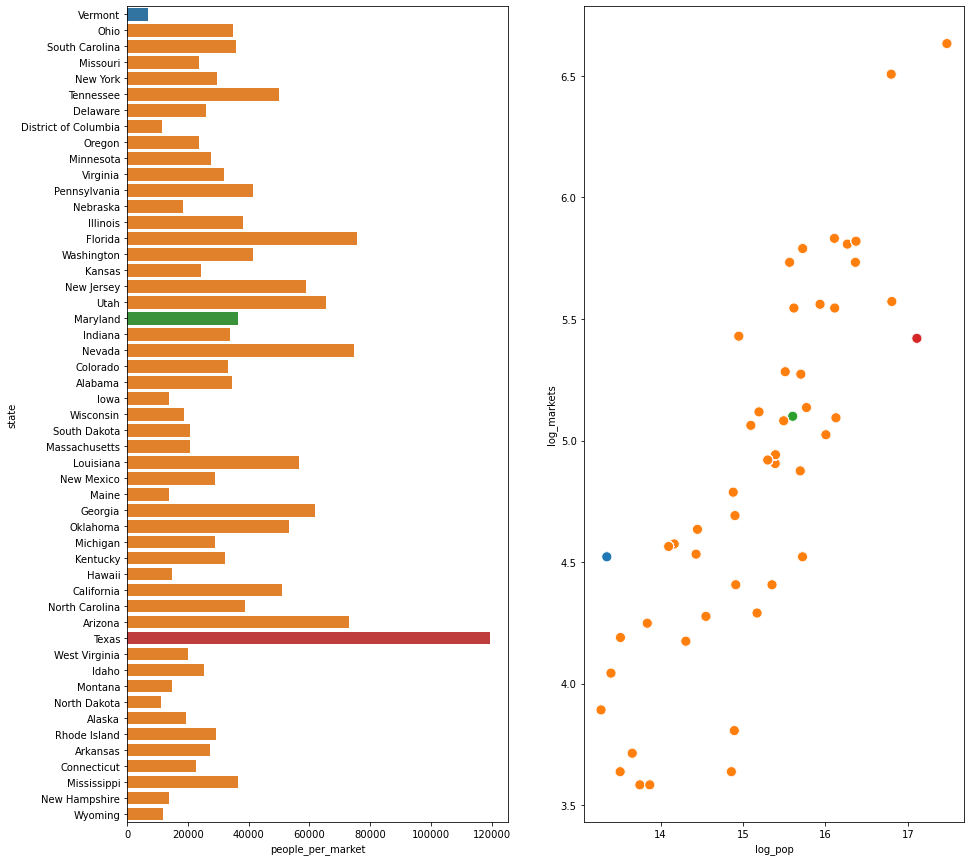

In [75]:
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

# Map the column for selected states to the bar color
sns.barplot('people_per_market', 'state', hue = 'is_selected',
            # Disable dodge so bars are full size
            dodge = False, 
            data = merged_df, ax = ax1)

# Map selected states to point color
sns.scatterplot('log_pop', 'log_markets', hue = 'is_selected', 
                data = merged_df, ax = ax2, s = 100)

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove() 
plt.show() 

In [77]:
merged_df.tail()

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Vegetables,WildHarvested,Wine,pop_est_2014,num_items_sold,log_pop,number_of_market,people_per_market,log_markets,is_selected
8688,1005678,Wind River Reservation Tribal Farmers Market,Arapahoe,Fremont,Wyoming,-108.484769,42.983952,3.0,1,0,...,1,1,0,584153,12,13.277918,49,11921.489796,3.89182,Other
8689,1005676,Wind River Reservation Tribal Farmers Market,Fort Washakie,Fremont,Wyoming,-108.882077,43.003640,4.0,1,0,...,1,1,0,584153,10,13.277918,49,11921.489796,3.89182,Other
8690,1005677,Wind River Reservation Tribal Farmers Market,"Ft. Washakie, WY",Fremont,Wyoming,-108.777196,43.026816,NaN,1,0,...,1,1,0,584153,12,13.277918,49,11921.489796,3.89182,Other
8691,1016841,Winter Makers Market,Casper,Natrona,Wyoming,-106.323421,42.848959,5.0,1,1,...,1,0,0,584153,14,13.277918,49,11921.489796,3.89182,Other
8692,1003473,Worland - Ten Sleep Farmer's Market,Worland,Washakie,Wyoming,-107.957175,44.017046,5.0,1,0,...,1,0,0,584153,8,13.277918,49,11921.489796,3.89182,Other


In [80]:
# Set background to white with grid
sns.set_style('whitegrid')

plt.scatter('good','prop selling', marker = '_', alpha = 0.7, data = goods_by_state)

# Draw lines across goods for highlighted states
highlighted = goods_by_state.query("state in ['New Mexico','North Dakota','Vermont']")
sns.lineplot('good','prop selling', 'state', data = highlighted, legend = False)

# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index = False).agg('first')
for _,row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop selling']),
                 ha = 'right', xytext = (5,0), textcoords = 'offset pixels')

# Remove all borders
sns.despine(bottom = True, left = True)
plt.show()


😀


SyntaxError: invalid character in identifier (<ipython-input-80-6f28b3bbefc5>, line 21)

In [81]:
# Decrease font size so state names are less crowded
sns.set(font_scale = 0.85)

# Switch to an appropriate color palette
blue_pal = sns.light_palette("steelblue", as_cmap = True)

# Order states by latitude
g = sns.heatmap(markets_by_month.reindex(state_by_lat), 
            # Add gaps between cells
            linewidths = 0.1, 
            # Set new palette and remove color bar 
            cmap = blue_pal, cbar = False,
            yticklabels = True)

# Rotate y-axis ticks 
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.title('Distribution of months open for farmers markets by latitude')
plt.show()

Months open                 1         2         3         4         5   ...        8         9         10        11        12
state                                                                   ...                                                  
Alabama               0.014085  0.056338  0.197183  0.197183  0.112676  ...  0.056338  0.000000  0.014085  0.000000  0.126761
Arizona               0.015152  0.000000  0.030303  0.106061  0.060606  ...  0.303030  0.015152  0.000000  0.000000  0.242424
Arkansas              0.016949  0.000000  0.000000  0.084746  0.169492  ...  0.067797  0.033898  0.016949  0.016949  0.169492
California            0.013575  0.000000  0.029412  0.058824  0.117647  ...  0.033937  0.024887  0.006787  0.009050  0.518100
Colorado              0.000000  0.000000  0.081633  0.326531  0.295918  ...  0.020408  0.000000  0.000000  0.000000  0.040816
Connecticut           0.000000  0.055556  0.000000  0.185185  0.425926  ...  0.037037  0.037037  0.000000  0.000000  0.055556
Delaware              0.035714  0.035714  0.142857  0.107143  0.250000  ...  0.035714  0.035714  0.000000  0.000000  0.035714
District of Columbia  0.000000  0.000000  0.022727  0.045455  0.159091  ...  0.068182  0.090909  0.000000  0.000000  0.045455
Florida               0.070513  0.012821  0.019231  0.019231  0.038462  ...  0.089744  0.019231  0.038462  0.000000  0.570513
Georgia               0.016129  0.008065  0.048387  0.080645  0.088710  ...  0.129032  0.096774  0.024194  0.008065  0.233871
Idaho                 0.000000  0.081081  0.054054  0.135135  0.351351  ...  0.000000  0.000000  0.000000  0.000000  0.054054
Illinois              0.026178  0.015707  0.062827  0.146597  0.324607  ...  0.041885  0.005236  0.000000  0.000000  0.020942
Indiana               0.000000  0.006944  0.048611  0.166667  0.312500  ...  0.006944  0.020833  0.000000  0.000000  0.041667
Iowa                  0.000000  0.000000  0.019802  0.168317  0.257426  ...  0.000000  0.000000  0.000000  0.000000  0.009901
Kansas                0.012987  0.000000  0.051948  0.168831  0.246753  ...  0.038961  0.012987  0.012987  0.000000  0.012987
Kentucky              0.000000  0.000000  0.010526  0.063158  0.136842  ...  0.063158  0.021053  0.021053  0.010526  0.042105
Louisiana             0.017544  0.017544  0.105263  0.070175  0.017544  ...  0.017544  0.070175  0.052632  0.000000  0.526316
Maine                 0.030303  0.015152  0.015152  0.106061  0.257576  ...  0.045455  0.015152  0.000000  0.000000  0.045455
Maryland              0.000000  0.000000  0.026087  0.147826  0.156522  ...  0.060870  0.026087  0.008696  0.008696  0.121739
Massachusetts         0.012500  0.025000  0.066667  0.187500  0.425000  ...  0.008333  0.000000  0.004167  0.000000  0.033333
Michigan              0.004202  0.004202  0.054622  0.151261  0.281513  ...  0.025210  0.000000  0.000000  0.004202  0.075630
Minnesota             0.000000  0.007874  0.062992  0.220472  0.314961  ...  0.015748  0.007874  0.000000  0.000000  0.007874
Mississippi           0.022222  0.000000  0.111111  0.244444  0.088889  ...  0.088889  0.022222  0.000000  0.044444  0.133333
Missouri              0.006024  0.006024  0.006024  0.078313  0.144578  ...  0.066265  0.006024  0.000000  0.000000  0.054217
Montana               0.000000  0.038462  0.173077  0.288462  0.250000  ...  0.000000  0.000000  0.000000  0.000000  0.019231
Nebraska              0.000000  0.018182  0.090909  0.327273  0.254545  ...  0.000000  0.000000  0.000000  0.000000  0.018182
Nevada                0.000000  0.076923  0.153846  0.307692  0.076923  ...  0.038462  0.038462  0.000000  0.000000  0.269231
New Hampshire         0.014493  0.000000  0.043478  0.231884  0.362319  ...  0.014493  0.000000  0.000000  0.000000  0.014493
New Jersey            0.009615  0.000000  0.038462  0.182692  0.365385  ...  0.000000  0.009615  0.000000  0.000000  0.048077
New Mexico            0.017857  0.017857  0.071429  0.250000  0.303571  ...  0.035714  0.000000  0.000000  0.000000  0.035714
New York              0.011111  0.008889  0.044444  0.133333  0.324444  ...  0.031111  0.015556  0.004444  0.002222  0.091111
North Carolina        0.000000  0.000000  0.018405  0.061350  0.134969  ...  0.171779  0.055215  0.000000  0.000000  0.128834
North Dakota          0.000000  0.062500  0.375000  0.312500  0.187500  ...  0.000000  0.000000  0.000000  0.000000  0.062500
Ohio                  0.005435  0.005435  0.065217  0.173913  0.331522  ...  0.027174  0.016304  0.000000  0.005435  0.038043
Oklahoma              0.029412  0.000000  0.147059  0.058824  0.147059  ...  0.088235  0.000000  0.000000  0.000000  0.058824
Oregon                0.016393  0.024590  0.057377  0.172131  0.188525  ...  0.032787  0.024590  0.000000  0.000000  0.081967
Pennsylvania          0.000000  0.000000  0.006944  0.055556  0.215278  ...  0.041667  0.006944  0.000000  0.000000  0.145833
Rhode Island          0.000000  0.029412  0.058824  0.352941  0.147059  ...  0.000000  0.000000  0.000000  0.000000  0.058824
South Carolina        0.014925  0.000000  0.059701  0.089552  0.104478  ...  0.089552  0.074627  0.000000  0.000000  0.104478
South Dakota          0.000000  0.043478  0.043478  0.347826  0.130435  ...  0.000000  0.000000  0.000000  0.000000  0.000000
Tennessee             0.000000  0.012195  0.024390  0.085366  0.134146  ...  0.121951  0.024390  0.000000  0.000000  0.121951
Texas                 0.007874  0.000000  0.031496  0.039370  0.047244  ...  0.031496  0.062992  0.062992  0.023622  0.480315
Utah                  0.000000  0.032258  0.225806  0.322581  0.096774  ...  0.032258  0.000000  0.000000  0.000000  0.032258
Vermont               0.000000  0.029412  0.029412  0.088235  0.264706  ...  0.014706  0.000000  0.000000  0.000000  0.000000
Virginia              0.000000  0.000000  0.038674  0.044199  0.104972  ...  0.143646  0.038674  0.000000  0.000000  0.132597
Washington            0.007634  0.000000  0.076336  0.198473  0.259542  ...  0.022901  0.015267  0.015267  0.000000  0.061069
West Virginia         0.053571  0.000000  0.017857  0.178571  0.196429  ...  0.000000  0.017857  0.000000  0.000000  0.089286
Wisconsin             0.010204  0.005102  0.061224  0.081633  0.387755  ...  0.030612  0.005102  0.000000  0.000000  0.015306
Wyoming               0.000000  0.064516  0.354839  0.387097  0.161290  ...  0.000000  0.000000  0.000000  0.000000  0.032258

[49 rows x 12 columns]
In [2]:
;



NameError: name 'markets_by_month' is not defined

In [ ]:
markets_by_state
Out[1]:

                   state  num_markets  population  people_per_market
45               Vermont           92      626562        6810.456522
34          North Dakota           66      739482       11204.272727
8   District of Columbia           57      658893       11559.526316
50               Wyoming           49      584153       11921.489796
15                  Iowa          228     3107126       13627.745614
29         New Hampshire           96     1326813       13820.968750
19                 Maine           96     1330089       13855.093750
26               Montana           70     1023579       14622.557143
11                Hawaii           97     1419561       14634.649485
27              Nebraska          103     1881503       18267.019417
49             Wisconsin          309     5757564       18632.893204
1                 Alaska           38      736732       19387.684211
48         West Virginia           93     1850326       19895.978495
21         Massachusetts          327     6745408       20628.159021
41          South Dakota           41      853175       20809.146341
6            Connecticut          158     3596677       22763.778481
25              Missouri          256     6063589       23685.894531
37                Oregon          167     3970239       23773.886228
16                Kansas          120     2904021       24200.175000
12                 Idaho           65     1634464       25145.600000
7               Delaware           36      935614       25989.277778
3               Arkansas          109     2966369       27214.394495
23             Minnesota          197     5457173       27701.385787
31            New Mexico           72     2085572       28966.277778
22              Michigan          341     9909877       29061.222874
39          Rhode Island           36     1055173       29310.361111
32              New York          670    19746227       29471.980597
46              Virginia          260     8326289       32024.188462
17              Kentucky          137     4413457       32215.014599
5               Colorado          161     5355866       33266.248447
14               Indiana          195     6596855       33830.025641
0                Alabama          140     4849377       34638.407143
35                  Ohio          333    11594163       34817.306306
40        South Carolina          135     4832482       35796.162963
20              Maryland          164     5976407       36441.506098
24           Mississippi           82     2994079       36513.158537
13              Illinois          337    12880580       38221.305638
33        North Carolina          256     9943964       38843.609375
38          Pennsylvania          309    12787209       41382.553398
47            Washington          170     7061530       41538.411765
42             Tennessee          131     6549352       49995.053435
4             California          760    38802500       51055.921053
36              Oklahoma           73     3878051       53123.986301
18             Louisiana           82     4649676       56703.365854
30            New Jersey          152     8938175       58803.782895
10               Georgia          163    10097343       61946.889571
44                  Utah           45     2942902       65397.822222
2                Arizona           92     6731484       73168.304348
28                Nevada           38     2839099       74713.131579
9                Florida          263    19893297       75639.912548
43                 Texas          226    26956958      119278.575221
In [2]:
;


Enhancing legibility
You and your colleagues have decided that the most important aspect of the data you want to show is the differences between the most "market-friendly" state, Vermont, and the least, Texas. To do this, put two plots side by side – a barplot showing the number of people per farmer's market in the state and a scatter plot showing the population on the x-axis and the number of markets on the y-axis.

Emphasize your findings by calling out Vermont and Texas by assigning them distinct colors. Also, provide a large and easy to read annotation for Texas.

Supplied is a vector state_colors that assigns Vermont and Texas unique colors and all other states gray along with the annotation describing Texas, tx_message

In [92]:
# Draw barplot w/ colors mapped to state_colors vector
sns.barplot('people_per_market', 'state', palette = "tab10", ## state_colors-- find a way to create color palatte
            data = merged_df, ax = ax1)


# Map state colors vector to the scatterplot as well
p = sns.scatterplot('pop_est_2014', 'number_of_market', color = "blue", # state_colors
                    data = merged_df, s = 60, ax = ax2)


# Log the x and y scales of our scatter plot so it's easier to read
ax2.set(xscale = "log", yscale = 'log')

# Increase annotation text size for legibility
tx_message= "Texas has a large population\nand relatively few farmers\nmarkets."
ax2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450),ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')
plt.show()

/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
